In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

import mylibrary.splinelib_nd as tsn

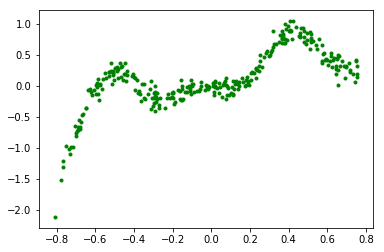

In [2]:
x = np.linspace(0,1,300)
noise = np.random.normal(0,0.02, x.shape)
x = x + noise
y= (2 * np.sin(10*x) + np.cos(20 * x - 3) + 3 * np.log(10*x + 0.5) - 4)/6.
noise = np.random.normal(0,0.1, x.shape)
y = y + noise
x = (x - 0.5)*1.5 #x.mean() # good practice to zero-center x in linear mapping
xx = x.reshape(-1,1)
yy = y.reshape(-1,1)
%matplotlib inline
plt.scatter(x, y, marker='.', color='g')

In [3]:
piece = tsn.SplineND(3)

In [4]:
h = 20
xyz = []

for x_ in np.linspace(piece.X[:,0].min(), piece.X[:,0].max(), h):
    for y_ in np.linspace(piece.X[:,1].min(), piece.X[:,1].max(), h):
        for z_ in np.linspace(piece.X[:,2].min(), piece.X[:,2].max(), h):
            xyz.append([x_,y_,z_])
xyz = np.array(xyz)            

In [5]:
piece.make_root_global_coverage(xyz)

incount = 0
outcount = 0
for xyzi in xyz:
    if piece.root.is_point_inside(xyzi):
        incount+=1
    else:
        outcount+=1
print(incount, outcount)

8000 0


In [6]:
piece = tsn.SplineND(1)

array([[0.51881416],
       [0.05990865]])

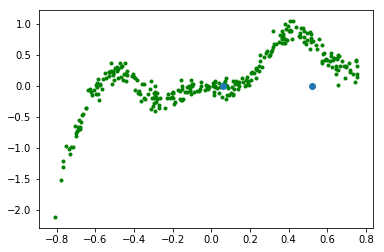

In [7]:
%matplotlib inline
plt.scatter(x, y, marker='.', color='g')
plt.scatter(piece.X, piece.Y)
piece.X

In [8]:
piece.make_root_global_coverage(xx)

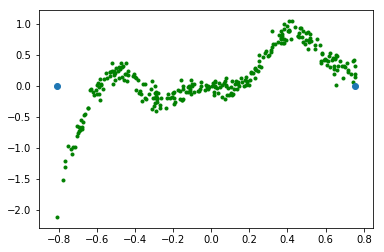

In [9]:
%matplotlib inline
plt.scatter(x, y, marker='.', color='g')
plt.scatter(piece.X, piece.Y)

In [10]:
# pts = piece.root.get_points()
# pts

In [11]:
piece.forward(xx)

In [12]:
'''
how to interpolate in n dimension
'''
print('This is experimentation')

This is experimentation


In [13]:
# y = a*x1 + b*x2 + c ## in 3D
# X.A = Y # in matrix form of N dimension

In [14]:
### in 1D
'''
[x1 1][X] = [y1]
[x2 1][B]   [y2]

'''
XY = np.random.uniform(size=(2,2))
XY

array([[0.63630179, 0.72531194],
       [0.291055  , 0.71085343]])

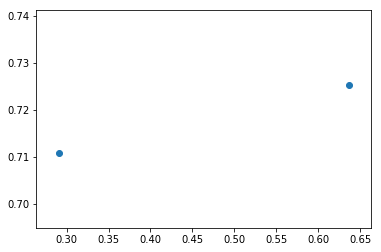

In [15]:
plt.scatter(XY[:,0], XY[:,1])

In [16]:
X = np.ones([2,2])
X

array([[1., 1.],
       [1., 1.]])

In [17]:
X[:,0] = XY[:,0]
X

array([[0.63630179, 1.        ],
       [0.291055  , 1.        ]])

In [18]:
Y = XY[:,1:]
Y

array([[0.72531194],
       [0.71085343]])

In [19]:
B = np.linalg.inv(X)@Y
B

array([[0.04187876],
       [0.69866441]])

In [20]:
X_test = np.array([[0.25, 1]])
Y_test = X_test@B

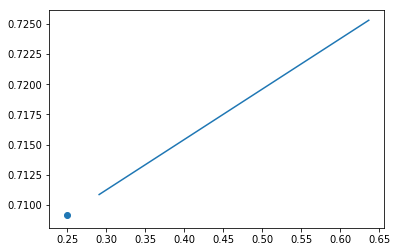

In [21]:
plt.plot(XY[:,0], XY[:,1])
plt.scatter(X_test[:,0], Y_test)

In [22]:
### this method works in 1D,
## Testing on 2D

In [23]:
### in 2D
'''
[x1.1 x2.1 1][x1]   [y1]
[x1.2 x2.2 1][x2] = [y2]
[x1.3 x2.3 1][B ]   [y2]

'''
XY = np.random.uniform(size=(3,3))
XY

array([[0.3897198 , 0.43322008, 0.22201077],
       [0.21346717, 0.92022957, 0.4497691 ],
       [0.69512042, 0.40678536, 0.76410045]])

In [26]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib

In [30]:
# num_points = 50
# X1 = np.linspace(-2.5, 2.5, num_points)
# X2 = np.linspace(-2, 4, num_points)
# X1, X2 = np.meshgrid(X1, X2)
# X1 = X1.reshape(-1)
# X2 = X2.reshape(-1)
# Y = np.sin(np.sqrt(X1**2 + X2**2))*2-1.

# %matplotlib tk
# fig = plt.figure()
# ax = fig.gca(projection='3d')
# ax.scatter(XY[:,0], XY[:,1], XY[:,2])
# ax.set_xlabel('X1')
# ax.set_ylabel('X2')
# ax.set_zlabel('Y')
# plt.show()

In [36]:
%matplotlib tk
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(XY[:,0], XY[:,1], XY[:,2])

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

In [33]:
X = np.ones([3,3])
X[:,:2] = XY[:,:2]
X

array([[0.3897198 , 0.43322008, 1.        ],
       [0.21346717, 0.92022957, 1.        ],
       [0.69512042, 0.40678536, 1.        ]])

In [34]:
Y = XY[:,2:]
Y

array([[0.22201077],
       [0.4497691 ],
       [0.76410045]])

In [35]:
B = np.linalg.inv(X)@Y
B

array([[ 1.87420287],
       [ 1.14595616],
       [-1.00485442]])

In [37]:
X_test = np.array([[0.5,0.6, 1]])
Y_test = X_test@B
Y_test

array([[0.61982071]])

In [41]:
%matplotlib tk
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(XY[:,0], XY[:,1], XY[:,2])
ax.plot(XY[:,0], XY[:,1], XY[:,2])
ax.scatter(X_test[:,0], X_test[:,1], Y_test)

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

In [42]:
############greatttttttttttt.....works for 2D as well##############
#######Hence,, this method works for any dimension##############